In [87]:
#######################
# Interpolates some f #
#######################
import radiant as rad
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams['axes.labelsize'] = 'x-large'
plt.rcParams['axes.titlesize'] = 'x-large'
plt.rcParams['xtick.labelsize'] = 'large'
plt.rcParams['ytick.labelsize'] = 'large'


# Problem Parameters
a = 0.
b = 1.


# def exact(*x):
#     return np.prod(np.cos((2 * np.pi * np.asarray(x) / (b - a)) ** 2) * 2 * np.pi * np.asarray(x) / (b - a), axis=0)

def exact(x1, x2):
  return (
    0.75 * np.exp(-((9 * x1 - 2) ** 2) / 4.0 - (9 * x2 - 2) ** 2 / 4.0)
    + 0.75 * np.exp(-((9 * x1 + 1) ** 2) / 49.0 - (9 * x2 + 1) / 10.0)
    + 0.5 * np.exp(-((9 * x1 - 7) ** 2) / 4.0 - (9 * x2 - 3) ** 2 / 4.0)
    - 0.2 * np.exp(-((9 * x1 - 4) ** 2) - (9 * x2 - 7) ** 2)
  )

f = exact

In [88]:
# Parameters
d = 2
k = 2
delta = 0.5
N = 21

# Computed Parameters
ranges = ((a, b),) * d
xc = rad.gridn(ranges, N)

# Integration
error_integrator = rad.integrate.QuadIntegrator(ranges)

# Solve for approximate solution
phi = rad.Wendland(d, k, delta, xc)
solver = rad.solve.InterpolationSolver(phi)
approx = solver.solve(f)
error = rad.error(exact, approx, error_integrator)

print("L2 Relative Error:", error)
print("Condition Number:", solver.cond())
print("Bandwidth:", solver.bandwidth())

L2 Relative Error: 0.0008173415934828854
Condition Number: 124974.0803750321
Bandwidth: (193, 193)


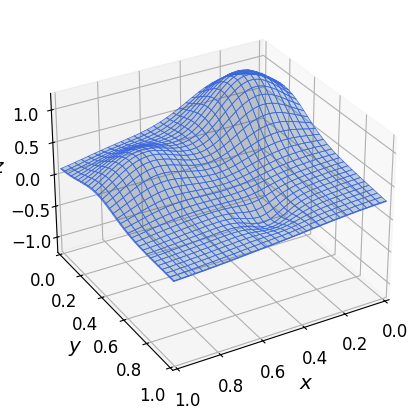

In [89]:
d = 2
k = 2
# deltas = [1., 0.5, 0.25, 0.1]
deltas = [0.5, 0.2]
N = 10
ranges = ((a, b),) * d
xc = rad.gridn(ranges, N)

x, y = rad.gridn(ranges, 250)
exact_val = exact(x, y)

fig = plt.figure(figsize=(5, 5))
ax = plt.subplot(projection='3d')
ax.plot_surface(x, y, f(x, y), edgecolor='royalblue', lw=0.5, rstride=8, cstride=8, alpha=0.25)
ax.set_zlim((-1.2, 1.2))
ax.view_init(30, 60, 0)
ax.margins(x=0., y=0.)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
plt.savefig("figures/interpolate/franke.pdf")

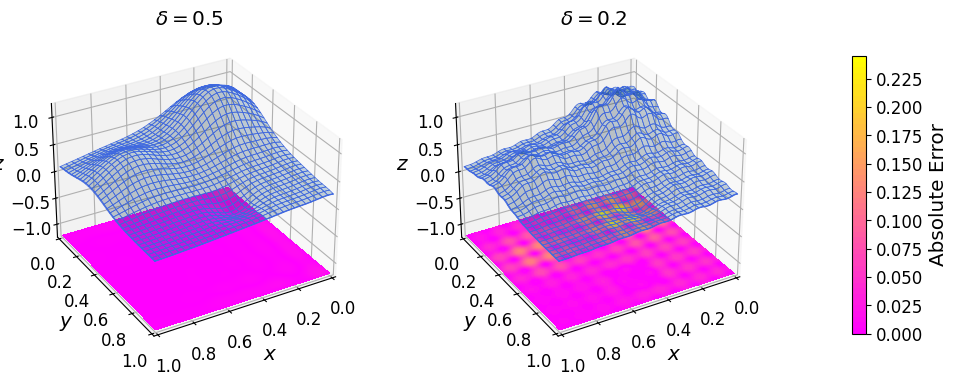

In [90]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4.5), subplot_kw={'projection': '3d'})

approx_vals = np.array([rad.solve.InterpolationSolver(rad.Wendland(d, k, delta, xc)).solve(f)(x, y) for delta in deltas])
errors = np.array([np.abs(approx_val - exact_val) for approx_val in approx_vals])
max_error = np.max(errors)

im = None
for i, (ax, delta, approx_val, rel_error) in enumerate(zip(axs.flat, deltas, approx_vals, errors)):
    surf = ax.plot_surface(x, y, approx_val, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8, alpha=0.25)
    im = ax.contourf(x, y, rel_error, 50, vmin=0., vmax=max_error, offset=-1.2, zdir='z', cmap='spring')
    ax.set_zlim((-1.2, 1.2))
    ax.view_init(30, 60, 0)
    ax.margins(x=-0.1, y=-0.1)
    ax.set_title(f"$\\delta = {delta}$")
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')

plt.tight_layout()
plt.subplots_adjust(hspace=0.25, wspace=0.25)
cbar = plt.colorbar(im, ax=axs.ravel().tolist(), shrink=0.7, pad=0.1)
cbar.set_label("Absolute Error")
plt.savefig("figures/interpolate/results.pdf", bbox_inches='tight', pad_inches=0.5)